In [1]:
import geemap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import ee
import os

ee.Initialize()

Map = geemap.Map(center=[31.539096,-81.422318], zoom=10)

In [2]:
#Shapefiles used for extracting pixel values - all within the GCE domain

gce_clip = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GA_simple.shp' ##Simplified GCE domain - reduced number of vertices
vcr_clip = 'F:/Wetlands shapefiles/VA_shapefile_wetlands/VA_simple.shp' ##Simplified VCR domain - reduced number of vertices
pie_clip = 'F:/Wetlands shapefiles/MA_shapefile_wetlands/MA_simple.shp' ##Simplified PIE domain - reduced number of vertices
wet_ga = geemap.shp_to_ee(gce_clip)
wet_va = geemap.shp_to_ee(vcr_clip)
wet_ma = geemap.shp_to_ee(pie_clip)
joinedFeatures = wet_ga.union()

gce_clipdiss = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GA_simpledissolve.shp'
dissolve_ga = geemap.shp_to_ee(gce_clipdiss)

gce_smalldiss = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GA_smalldissolve.shp'
gce_smalldiss2 = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GA_smalldissolve2.shp'
gce_smalldiss3 = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GA_smalldissolve3.shp'

smalldissolve_ga = geemap.shp_to_ee(gce_smalldiss)
small2dissolve_ga = geemap.shp_to_ee(gce_smalldiss2)
small3dissolve_ga = geemap.shp_to_ee(gce_smalldiss3)

gce_fluxdiss = 'F:/Wetlands shapefiles/GA_shapefile_wetlands/GA_fluxdissolve.shp'
flux_ga = geemap.shp_to_ee(gce_fluxdiss)

In [3]:
#Pixel counts of each region:
image = ee.Image('LANDSAT/LT05/C02/T1_L2/LT05_016038_19990711')
x = image.reduceRegion(geometry=flux_ga, reducer=ee.Reducer.count(), scale=30)
x.getInfo()

{'QA_PIXEL': 4193,
 'QA_RADSAT': 4193,
 'SR_ATMOS_OPACITY': 4193,
 'SR_B1': 4193,
 'SR_B2': 4193,
 'SR_B3': 4193,
 'SR_B4': 4193,
 'SR_B5': 4193,
 'SR_B7': 4193,
 'SR_CLOUD_QA': 2433,
 'ST_ATRAN': 4193,
 'ST_B6': 4193,
 'ST_CDIST': 4193,
 'ST_DRAD': 4193,
 'ST_EMIS': 4193,
 'ST_EMSD': 4193,
 'ST_QA': 4193,
 'ST_TRAD': 4193,
 'ST_URAD': 4193}

In [4]:
##FLATS

#12/08/22 - add calibrated flats to images
def addFLATSL7(image):
    flats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(1.51 + 12.5*(RED-SWIR)/(RED+SWIR) - 41.2*(NIR-RED)/(NIR+6*RED-7.5*BLUE+1)))', {
            'SWIR': image.select('SR_B5'),
            'NIR': image.select('SR_B4'),
            'RED': image.select('SR_B3'),
            'BLUE': image.select('SR_B1')
        })
    
    return image.addBands(flats.rename('flats'))

def addFLATSL5(image):
    flats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(1.51 + 12.5*(0.972*(RED-SWIR)/(RED+SWIR)-0.008) - 41.2*(0.991*(NIR-RED)/(NIR+6*RED-7.5*BLUE+1)-0.0014)))', {
            'SWIR': image.select('SR_B5'),
            'NIR': image.select('SR_B4'),
            'RED': image.select('SR_B3'),
            'BLUE': image.select('SR_B1')
        })
    
    return image.addBands(flats.rename('flats'))


def addFLATSL8(image):
    flats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(1.51 + 12.5*(0.841*(RED-SWIR)/(RED+SWIR) - 0.019) - 41.2*(0.771*(NIR-RED)/(NIR+6*RED-7.5*BLUE+1) + 0.011)))', {
            'SWIR': image.select('SR_B6'),
            'NIR': image.select('SR_B5'),
            'RED': image.select('SR_B4'),
            'BLUE': image.select('SR_B2')
        })
    
    return image.addBands(flats.rename('flats'))

# def addFLATSL9(image):
#     flats = ee.Image(0).expression(
#         '1/(1+2.718281828459045**-(1.51 + 12.5*(1.225*(RED-SWIR)/(RED+SWIR) + 0.096) - 41.2*(1.038* (NIR-RED)/(NIR+6*RED-7.5*BLUE+1) - 0.004)))', {
#             'SWIR': image.select('SR_B6'),
#             'NIR': image.select('SR_B5'),
#             'RED': image.select('SR_B4'),
#             'BLUE': image.select('SR_B2')
#         })
    
#     return image.addBands(flats.rename('flats'))


##NOTE: above is 7-9 calibration; below is 8-9 calibration

def addFLATSL9(image):
    flats = ee.Image(0).expression(
        '1/(1+2.718281828459045**-(1.51 + 12.5*(0.945*(RED-SWIR)/(RED+SWIR) - 0.055) - 41.2*(0.974* (NIR-RED)/(NIR+6*RED-7.5*BLUE+1) - 0.0005)))', {
            'SWIR': image.select('SR_B6'),
            'NIR': image.select('SR_B5'),
            'RED': image.select('SR_B4'),
            'BLUE': image.select('SR_B2')
        })
    
    return image.addBands(flats.rename('flats'))

# def addFLATS(image):
#     flats = ee.Image(0).expression(
#         '1/(1+2.718281828459045**-(-1.57 + 20*(RED-SWIR)/(RED+SWIR) + 68.6*(GREEN-RED)/(GREEN+RED)))', {
#             'SWIR': image.select('SR_B6'),
#             'RED': image.select('SR_B4'),
#             'GREEN': image.select('SR_B3')
#         })
    
#     return image.addBands(flats.rename('flats'))

# def addFLATSL5(image):
#     flats = ee.Image(0).expression(
#         '1/(1+2.718281828459045**-(-1.57 + 20*(RED-SWIR)/(RED+SWIR) + 68.6*(GREEN-RED)/(GREEN+RED)))', {
#             'SWIR': image.select('SR_B5'),
#             'RED': image.select('SR_B3'),
#             'GREEN': image.select('SR_B2')
#         })
    
#     return image.addBands(flats.rename('flats'))

#NDWI
def addndwi(image):
    ndwi = ee.Image(0).expression(
        '((RED-SWIR)/(RED+SWIR))', {
            'SWIR': image.select('SR_B6'),
            'RED': image.select('SR_B4'),
            'GREEN': image.select('SR_B3')
        })
    
    return image.addBands(ndwi.rename('ndwi'))

def addndwiL5(image):
    ndwi = ee.Image(0).expression(
        '((RED-SWIR)/(RED+SWIR))', {
            'SWIR': image.select('SR_B5'),
            'RED': image.select('SR_B3'),
            'GREEN': image.select('SR_B2')
        })
    
    return image.addBands(ndwi.rename('ndwi'))

#PHENO
def addpheno(image):
    pheno = ee.Image(0).expression(
        '((GREEN-RED)/(RED+GREEN))', {
            'SWIR': image.select('SR_B6'),
            'RED': image.select('SR_B4'),
            'GREEN': image.select('SR_B3')
        })
    
    return image.addBands(pheno.rename('pheno'))

def addphenoL5(image):
    pheno = ee.Image(0).expression(
        '((GREEN-RED)/(RED+GREEN))', {
            'SWIR': image.select('SR_B5'),
            'RED': image.select('SR_B3'),
            'GREEN': image.select('SR_B2')
        })
    
    return image.addBands(pheno.rename('pheno'))

#NIRv
def addnirv(image):
    nirv = ee.Image(0).expression(
        'NIR*(NIR-RED)/(NIR+RED)', {
            'RED': image.select('SR_B4'),
            'NIR': image.select('SR_B5')
        })
    
    return image.addBands(nirv.rename('nirv'))

def addnirvL5(image):
    nirv = ee.Image(0).expression(
        'NIR*(NIR-RED)/(NIR+RED)', {
            'RED': image.select('SR_B3'),
            'NIR': image.select('SR_B4')
        })
    
    return image.addBands(nirv.rename('nirv'))

#EVI
def addeviL5(image):
    evi = ee.Image(0).expression(
        '(NIR-RED)/(NIR+6*RED-7.5*BLUE+1)', {
            'RED': image.select('SR_B3'),
            'NIR': image.select('SR_B4'),
            'BLUE': image.select('SR_B1'),

        })
    
    return image.addBands(evi.rename('evi'))

def addevi(image):
    evi = ee.Image(0).expression(
        '(NIR-RED)/(NIR+6*RED-7.5*BLUE+1)', {
            'RED': image.select('SR_B4'),
            'NIR': image.select('SR_B5'),
            'BLUE': image.select('SR_B2'),

        })
    
    return image.addBands(evi.rename('evi'))

#12/01/22
#VARI
def addvariL5(image):
    vari = ee.Image(0).expression(
        '(GREEN-RED)/(GREEN+RED-BLUE)', {
            'RED': image.select('SR_B3'),
            'GREEN': image.select('SR_B2'),
            'BLUE': image.select('SR_B1'),

        })
    
    return image.addBands(vari.rename('vari'))

def addvari(image):
    vari = ee.Image(0).expression(
        '(GREEN-RED)/(GREEN+RED-BLUE)', {
            'RED': image.select('SR_B4'),
            'GREEN': image.select('SR_B3'),
            'BLUE': image.select('SR_B2'),

        })
    
    return image.addBands(vari.rename('vari'))


#GLI
def addgliL5(image):
    gli = ee.Image(0).expression(
        '((GREEN-RED) + (GREEN-BLUE))/(2*GREEN+RED+BLUE)', {
            'RED': image.select('SR_B3'),
            'GREEN': image.select('SR_B2'),
            'BLUE': image.select('SR_B1'),

        })
    
    return image.addBands(gli.rename('gli'))

def addgli(image):
    gli = ee.Image(0).expression(
        '((GREEN-RED) + (GREEN-BLUE))/(2*GREEN+RED+BLUE)', {
            'RED': image.select('SR_B4'),
            'GREEN': image.select('SR_B3'),
            'BLUE': image.select('SR_B2'),

        })
    
    return image.addBands(gli.rename('gli'))

In [5]:
##Function to cloud mask from the pixel_qa band of Landsat 5/8 SR data.
def maskL5sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    # Apply the scaling factors to the appropriate bands.
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
    # Replace the original bands with the scaled ones and apply the masks.
    return image.addBands(opticalBands, None, True) \
    .addBands(thermalBands, None, True) \
    .updateMask(qaMask) \
    .updateMask(saturationMask)

In [6]:
#Data load
# df1 = pd.read_csv('C:/Users/arj26323/Documents/Data/flats/flats_pairs.csv')
df1 = pd.read_csv('C:/Users/arj26323/Documents/Data/flats/flats_pairdates.csv')
df1['Date_A'] = pd.to_datetime(df1['Date_A'], format = '%Y-%m-%d')
df1['Date_B'] = pd.to_datetime(df1['Date_B'], format = '%Y-%m-%d')

#Tides
tides = pd.read_csv('C:/Users/arj26323/Documents/Data/flats/water_level_filtered_1999_2022.csv')
tides['Date'] = pd.to_datetime(tides['Date'], format = '%m/%d/%Y')

tides['Verified_m'] = tides['Verified_m'].str.replace("\U00002013", "-").str.replace(r'^-$', '0', regex=True).astype(float)

# display(tides['Date'])

dictide = tides.groupby(['Date'], as_index = False).aggregate({'Verified_m': np.mean}).set_index('Date').to_dict()['Verified_m'] 

# df1['Tide_height'] = df1['Date'].map(dictide)

df1['Tide_A'] = df1['Date_A'].map(dictide).astype(float)
df1['Tide_B'] = df1['Date_B'].map(dictide).astype(float)

df1 = df1[df1['Tide_A'].notna() & df1['Tide_B'].notna()]
df1['Tide_diff'] = df1['Tide_B'] - df1['Tide_A'] 

conditions_A = [ df1['Tide_A'] >= 0.9, (df1['Tide_A'] < 0.9) & (df1['Tide_A']> -1.1), df1['Tide_A'] <= -1.1 ]
conditions_B = [ df1['Tide_B'] >= 0.9, (df1['Tide_B'] < 0.9) & (df1['Tide_B']> -1.1), df1['Tide_B'] <= -1.1 ]
choices = [ "Flood", 'Mid', 'Ebb' ]

df1['Tidestatus_A'] = np.select(conditions_A, choices, default=np.nan)
df1['Tidestatus_B'] = np.select(conditions_B, choices, default=np.nan)

df1

Unnamed: 0                                      Image_x     Sensor_x  \
0             0  LANDSAT/LT05/C02/T1_L2/LT05_016038_19990711  Landsat 5/7   
1             1  LANDSAT/LT05/C02/T1_L2/LT05_016038_19990727  Landsat 5/7   
2             2  LANDSAT/LT05/C02/T1_L2/LT05_016038_19990812  Landsat 5/7   
3             3  LANDSAT/LT05/C02/T1_L2/LT05_016038_19990828  Landsat 5/7   
4             4  LANDSAT/LT05/C02/T1_L2/LT05_016038_19990913  Landsat 5/7   
..          ...                                          ...          ...   
633          48  LANDSAT/LC08/C02/T1_L2/LC08_017038_20220903  Landsat 8/9   
634          49  LANDSAT/LC08/C02/T1_L2/LC08_016038_20220912  Landsat 8/9   
635          50  LANDSAT/LC08/C02/T1_L2/LC08_016039_20220912  Landsat 8/9   
636          51  LANDSAT/LC08/C02/T1_L2/LC08_017038_20220919  Landsat 8/9   
637          52  LANDSAT/LC08/C02/T1_L2/LC08_016038_20220928  Landsat 8/9   

          LS_x      Date_x     Date_A  \
0    Landsat 5  1999-07-11 1999-07-11   
1    Landsat 5  1999-07-27 1999-07-27   
2    Landsat 5  1999-08-12 1999-08-12   
3    Landsat 5  1999-08-28 1999-08-28   
4    Landsat 5  1999-09-13 1999-09-13   
..         ...         ...        ...   
633  Landsat 8  2022-09-03 2022-09-03   
634  Landsat 8  2022-09-12 2022-09-12   
635  Landsat 8  2022-09-12 2022-09-12   
636  Landsat 8  2022-09-19 2022-09-19   
637  Landsat 8  2022-09-28 2022-09-28   

                                         Image_y     Sensor_y       LS_y  \
0    LANDSAT/LE07/C02/T1_L2/LE07_017038_19990710  Landsat 7/5  Landsat 7   
1    LANDSAT/LE07/C02/T1_L2/LE07_017038_19990726  Landsat 7/5  Landsat 7   
2    LANDSAT/LE07/C02/T1_L2/LE07_017038_19990811  Landsat 7/5  Landsat 7   
3    LANDSAT/LE07/C02/T1_L2/LE07_017038_19990827  Landsat 7/5  Landsat 7   
4    LANDSAT/LE07/C02/T1_L2/LE07_017038_19990912  Landsat 7/5  Landsat 7   
..                                           ...          ...        ...   
633  LANDSAT/LC09/C02/T1_L2/LC09_016039_20220904  Landsat 9/8  Landsat 9   
634  LANDSAT/LC09/C02/T1_L2/LC09_017038_20220911  Landsat 9/8  Landsat 9   
635  LANDSAT/LC09/C02/T1_L2/LC09_017038_20220911  Landsat 9/8  Landsat 9   
636  LANDSAT/LC09/C02/T1_L2/LC09_016039_20220920  Landsat 9/8  Landsat 9   
637  LANDSAT/LC09/C02/T1_L2/LC09_017038_20220927  Landsat 9/8  Landsat 9   

         Date_y     Date_B    Tide_A    Tide_B  Tide_diff Tidestatus_A  \
0    1999-07-10 1999-07-10 -1.453000 -1.697333  -0.244333          Ebb   
1    1999-07-26 1999-07-26 -0.645000 -0.911667  -0.266667          Mid   
2    1999-08-11 1999-08-11  0.426667 -0.031667  -0.458333          Mid   
3    1999-08-27 1999-08-27  0.575667  0.017000  -0.558667          Mid   
4    1999-09-12 1999-09-12  1.164667  1.143667  -0.021000        Flood   
..          ...        ...       ...       ...        ...          ...   
633  2022-09-04 2022-09-04  0.752667  0.243667  -0.509000          Mid   
634  2022-09-11 2022-09-11  0.965333  0.621333  -0.344000        Flood   
635  2022-09-11 2022-09-11  0.965333  0.621333  -0.344000        Flood   
636  2022-09-20 2022-09-20  0.021333 -0.332667  -0.354000          Mid   
637  2022-09-27 2022-09-27  1.279667  0.771667  -0.508000        Flood   

    Tidestatus_B  
0            Ebb  
1            Mid  
2            Mid  
3            Mid  
4          Flood  
..           ...  
633          Mid  
634          Mid  
635          Mid  
636          Mid  
637          Mid  

[634 rows x 16 columns]

In [7]:
df57 = df1.iloc[:328,:] #Note: this range changed when NaN tide rows were filtered out of df1

def addTide(img):
    tidediff = img.getNumber('tidediff')
    new_value = ee.Image(tidediff).rename('tidedifference')
    return img.addBands(new_value)

# def addTidestatusA(img):
#     tidestatusA = img.get('tidestatusA')
#     new_value = ee.Image(tidestatusA).rename('tidestatusA')
#     return img.addBands(new_value)

# def addTidestatusB(img):
#     tidestatusB = img.getNumber('tidestatusB')
#     new_value = ee.Image(tidestatusB).rename('tidestatusB')
#     return img.addBands(new_value)

calibr = []
for i in range(len(df57)):
    x = ee.Image(addFLATSL5(addvariL5(addeviL5(addnirvL5(addphenoL5(addndwiL5(maskL5sr(ee.Image(df57.loc[i, 'Image_x'])))))))))
    y = ee.Image(addFLATSL7(addvariL5(addeviL5(addnirvL5(addphenoL5(addndwiL5(maskL5sr(ee.Image(df57.loc[i, 'Image_y'])))))))))
    combined_image = addTide(x.addBands(y).set({'tidediff':df57.loc[i, 'Tide_diff']}))
    try:
        region = dissolve_ga #flux_ga vs. dissolve_ga
        sample57x = geemap.ee_to_pandas(combined_image.sampleRegions(collection = region, scale = 30))
        calibr.append(sample57x) 
    except Exception:
        try:
            region = flux_ga
            sample57x = geemap.ee_to_pandas(combined_image.sampleRegions(collection = region, scale = 30))
            calibr.append(sample57x)
        except Exception:
            continue

calibr_list = pd.concat(calibr) #239 pairs of dates

3388
2


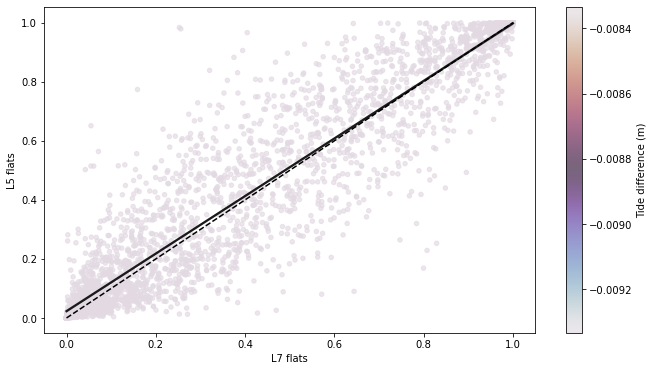

In [8]:
import seaborn as sns

calibr_list = pd.concat(calibr)

# calibr_list = calibr_list[calibr_list['ndwi_1'].between(-2, 2)] #just getting rid of the outliers - pheno and ndwi
# calibr_list = calibr_list[calibr_list['evi_1'].between(-2, 2)] #just getting rid of the outliers
calibr_list = calibr_list[calibr_list['tidedifference'].between(-0.01, 0.01)]

##NOTE: EVI seems very robust to tide differences

# g = sns.FacetGrid(data=calibr_list, aspect=1.5, palette='BuGn', height=5) #change point size to better visualize
# g = sns.lmplot(data=calibr_list, x = 'ndwi', y='ndwi_1', aspect=1.5, palette='BuGn', height=5)
# g.map(plt.scatter, 'ndwi', 'ndwi_1').add_legend()
# g.set_axis_labels("L5 ndwi", "L7 ndwi")

fig, ax = plt.subplots()
fig.set_size_inches(11, 6)

points = plt.scatter(data = calibr_list, x = 'flats_1', y='flats',
                     c="tidedifference", s=20, cmap="twilight", alpha=0.65)
plt.colorbar(points, label = 'Tide difference (m)')
sns.regplot(x='flats_1', y="flats", data=calibr_list, scatter=False, color=".1").set(xlabel='L7 flats', ylabel='L5 flats')

plt.plot([0, 1], [0, 1], 'k--')

print(len(calibr_list))
print(len(calibr_list['tidedifference'].unique()))

# plt.plot([-1, 1.5], [-1, 1.5], 'k--')

In [9]:
#Cross cal regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

calibr_list = pd.concat(calibr)
calibr_list = calibr_list[calibr_list['tidedifference'].between(-0.04, 0.04)] #Keep it consistent

#evi
# lm = LinearRegression().fit(np.array(calibr_list.evi_1).reshape((-1, 1)), np.array(calibr_list.evi).reshape((-1, 1)))
print('evi: ')

#L7 = m*L5 + c

y = calibr_list['evi_1'] #L7
x = calibr_list[['evi']] #L5
lm = LinearRegression().fit(x,y)

print(lm.coef_)
print(lm.intercept_)
print(lm.score)
print(len(x))

print(lm.score(x,y))

#ndwi
print('ndwi: ')

calibr_list = calibr_list[calibr_list['tidedifference'].between(-0.02, 0.02)]

y = calibr_list['ndwi_1'] #L7
x = calibr_list[['ndwi']] #L5
lm = LinearRegression().fit(x,y)

print(lm.coef_)
print(lm.intercept_)
print(lm.score)

print(lm.score(x,y))
print(len(x))

evi: 
[0.99086223]
-0.0014418548031575051
<bound method RegressorMixin.score of LinearRegression()>
16604
0.8543409019603042
ndwi: 
[0.97184284]
-0.007728162214483358
<bound method RegressorMixin.score of LinearRegression()>
0.9248509410976776
9722


In [10]:
df78 = df1.iloc[328:581,:] #Again, this range changes when NaN tide rows are filtered out

def addTide(img):
    tidediff = img.getNumber('tidediff')
    new_value = ee.Image(tidediff).rename('tidedifference')
    return img.addBands(new_value)

calibr2 = []
for i in range(332,585): #Again, this range changes when NaN tide rows are filtered out
    x = ee.Image(addFLATSL7(addvariL5(addeviL5(addnirvL5(addphenoL5(addndwiL5(maskL5sr(ee.Image(df78.loc[i, 'Image_x'])))))))))
    y = ee.Image(addFLATSL8(addvari(addevi(addnirv(addpheno(addndwi(maskL5sr(ee.Image(df78.loc[i, 'Image_y'])))))))))
    combined_image = addTide(x.addBands(y).set({'tidediff':df78.loc[i, 'Tide_diff']}))
    try:
        region = dissolve_ga
        sample78x = geemap.ee_to_pandas(combined_image.sampleRegions(collection = region, scale = 30))
        calibr2.append(sample78x) 
    except Exception:
        try:
            region = flux_ga
            sample78x = geemap.ee_to_pandas(combined_image.sampleRegions(collection = region, scale = 30))
            calibr2.append(sample78x)
        except Exception:
            continue

calibr_78 = pd.concat(calibr2) #171 unique pairs

3781
3


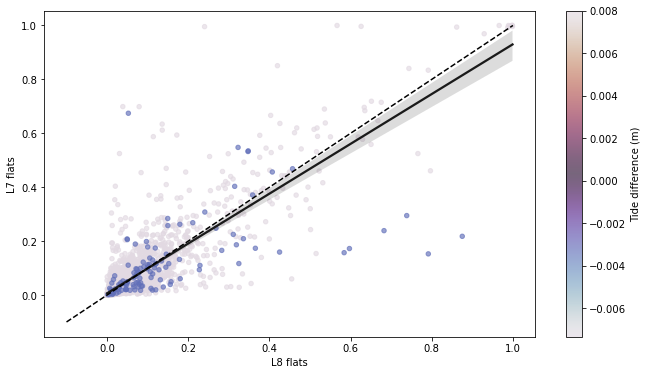

In [11]:
calibr_78 = pd.concat(calibr2)

# calibr_78 = calibr_78[calibr_78['ndwi'].between(-2, 2) & calibr_78['ndwi_1'].between(-2, 2)] #getting rid of the outliers
# calibr_78 = calibr_78[calibr_78['evi'].between(-1, 1)] #just getting rid of the outliers
calibr_78 = calibr_78[calibr_78['tidedifference'].between(-0.01, 0.01)]
calibr_78 = calibr_78[calibr_78['tidedifference'] != 0] #removing weird values - recalculate coefficients

fig, ax = plt.subplots()
fig.set_size_inches(11, 6)

points = plt.scatter(data = calibr_78, x = 'flats_1', y='flats',
                     c="tidedifference", s=20, cmap="twilight", alpha=0.65)
plt.colorbar(points, label = 'Tide difference (m)')
sns.regplot(x='flats_1', y="flats", data=calibr_78, scatter=False, color=".1").set(xlabel='L8 flats', ylabel='L7 flats')

# plt.plot([-0.25, 0.5], [-0.25, 0.5], 'k--')

# display(calibr_78)
print(len(calibr_78))
print(len(calibr_78['tidedifference'].unique()))
# print(calibr_78['tidedifference'].unique()) ##LOOKING FOR STRANGE PAIR

plt.plot([-0.1, 1], [-0.1, 1], 'k--')

In [12]:
#Cross cal regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

calibr_78 = pd.concat(calibr2)
calibr_78 = calibr_78[calibr_78['tidedifference'] != 0] #removing weird values - recalculate coefficients. One weird pair
calibr_78 = calibr_78[calibr_78['tidedifference'].between(-0.04, 0.04)] #Keep it consistent

#evi

# lm = LinearRegression().fit(np.array(calibr_list.evi_1).reshape((-1, 1)), np.array(calibr_list.evi).reshape((-1, 1)))
print('evi: ')

# calibr_78 = calibr_78[calibr_78['evi'].between(-1, 1)] #just getting rid of the outliers

#L7 = m*L8 + c

x = calibr_78[['evi_1']] #L8
y = calibr_78['evi'] #L7
lm = LinearRegression().fit(x,y)

print(lm.coef_)
print(lm.intercept_)
print(lm.score)
print(len(x))

print(lm.score(x,y))

#ndwi
print('ndwi: ')

calibr_78 = calibr_78[calibr_78['tidedifference'].between(-0.02, 0.02)]

x = calibr_78[['ndwi_1']] #L8
y = calibr_78['ndwi'] #L7
lm = LinearRegression().fit(x,y)

print(lm.coef_)
print(lm.intercept_)
print(lm.score)

print(lm.score(x,y))
print(len(x))

evi: 
[0.77108025]
0.010926996105807954
<bound method RegressorMixin.score of LinearRegression()>
12428
0.777461555174588
ndwi: 
[0.84062409]
-0.018667665145604584
<bound method RegressorMixin.score of LinearRegression()>
0.7205385163541405
4635


In [13]:
df89 = df1.iloc[581:,:] #Again, this range changes when NaN tide rows are filtered out

def addTide(img):
    tidediff = img.getNumber('tidediff')
    new_value = ee.Image(tidediff).rename('tidedifference')
    return img.addBands(new_value)


calibr3 = []
for i in range(585, len(df1)): #Again, this range changes when NaN tide rows are filtered out
    x = ee.Image(addFLATSL8(addvari(addevi(addnirv(addpheno(addndwi(maskL5sr(ee.Image(df89.loc[i, 'Image_x'])))))))))
    y = ee.Image(addFLATSL9(addvari(addevi(addnirv(addpheno(addndwi(maskL5sr(ee.Image(df89.loc[i, 'Image_y'])))))))))
    combined_image = addTide(x.addBands(y).set({'tidediff':df89.loc[i, 'Tide_diff']}))
    try:
        region = dissolve_ga
        sample89x = geemap.ee_to_pandas(combined_image.sampleRegions(collection = region, scale = 30))
        calibr3.append(sample89x) 
    except Exception:
        try:
            region = flux_ga
            sample89x = geemap.ee_to_pandas(combined_image.sampleRegions(collection = region, scale = 30))
            calibr3.append(sample89x)
        except Exception:
            continue

calibr_89 = pd.concat(calibr3) #19 unique pairs

965
1


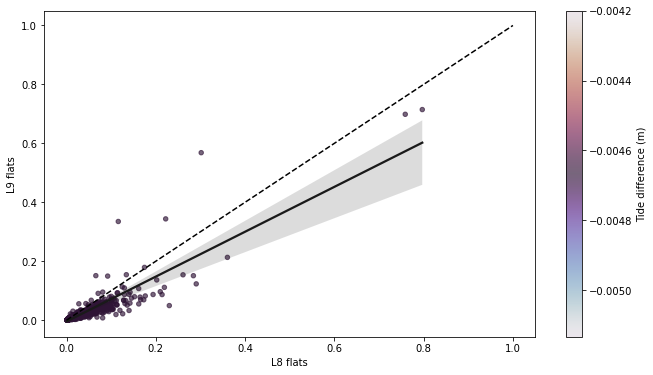

In [14]:
calibr_89 = pd.concat(calibr3)

# calibr_89 = calibr_89[calibr_89['ndwi'].between(-2, 2) & calibr_89['ndwi_1'].between(-2, 2)] #getting rid of the outliers
calibr_89 = calibr_89[calibr_89['tidedifference'].between(-0.01, 0.01)]

fig, ax = plt.subplots()
fig.set_size_inches(11, 6)

points = plt.scatter(data = calibr_89, x = 'flats', y='flats_1',
                     c="tidedifference", s=20, cmap="twilight", alpha=0.65)
plt.colorbar(points, label = 'Tide difference (m)')
sns.regplot(x='flats', y="flats_1", data=calibr_89, scatter=False, color=".1").set(xlabel='L8 flats', ylabel='L9 flats')

# g.set_axis_labels("L8 ndwi", "L9 ndwi")
# plt.plot([-0.1, 0.4], [-0.1, 0.4], 'k--')

# display(calibr_89)
print(len(calibr_89))
print(len(calibr_89['tidedifference'].unique()))

plt.plot([0, 1], [0, 1], 'k--')

In [15]:
#Cross cal regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

calibr_89 = pd.concat(calibr3)
calibr_89 = calibr_89[calibr_89['tidedifference'].between(-0.04, 0.04)] #Keep it consistent

#L8 = m*L9 + c

#evi
mod = sm.OLS(calibr_89.evi_1, calibr_89.evi)
res = mod.fit()

print(res.summary()) 

# lm = LinearRegression().fit(np.array(calibr_list.evi_1).reshape((-1, 1)), np.array(calibr_list.evi).reshape((-1, 1)))

print('evi: ')

x = calibr_89[['evi_1']] #L9
y = calibr_89['evi'] #L8
lm = LinearRegression().fit(x,y)

print(lm.coef_)
print(lm.intercept_)
print(lm.score)
print(len(x))

print(lm.score(x,y))

#ndwi

print('ndwi: ')

x = calibr_89[['ndwi_1']] #L9
y = calibr_89['ndwi'] #L8
lm = LinearRegression().fit(x,y)

print(lm.coef_)
print(lm.intercept_)
print(lm.score)

print(lm.score(x,y))
print(len(x))

                                 OLS Regression Results                                
Dep. Variable:                  evi_1   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.012e+06
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                        0.00
Time:                        13:28:29   Log-Likelihood:                          20394.
No. Observations:                5157   AIC:                                 -4.079e+04
Df Residuals:                    5156   BIC:                                 -4.078e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
df1.shape

df78 = df1.iloc[328:581,:]

df78

Unnamed: 0                                      Image_x     Sensor_x  \
332           4  LANDSAT/LE07/C02/T1_L2/LE07_016038_20130709  Landsat 7/8   
333           5  LANDSAT/LE07/C02/T1_L2/LE07_016038_20130725  Landsat 7/8   
334           6  LANDSAT/LE07/C02/T1_L2/LE07_016038_20130810  Landsat 7/8   
335           7  LANDSAT/LE07/C02/T1_L2/LE07_016038_20130826  Landsat 7/8   
336           8  LANDSAT/LE07/C02/T1_L2/LE07_016038_20130911  Landsat 7/8   
..          ...                                          ...          ...   
580         252  LANDSAT/LE07/C02/T1_L2/LE07_016038_20220507  Landsat 7/8   
581         253  LANDSAT/LE07/C02/T1_L2/LE07_016038_20220524  Landsat 7/8   
582         254  LANDSAT/LE07/C02/T1_L2/LE07_016038_20220726  Landsat 7/8   
583         255  LANDSAT/LE07/C02/T1_L2/LE07_017038_20220903  Landsat 7/8   
584         256  LANDSAT/LE07/C02/T1_L2/LE07_017038_20220920  Landsat 7/8   

          LS_x      Date_x     Date_A  \
332  Landsat 7  2013-07-09 2013-07-09   
333  Landsat 7  2013-07-25 2013-07-25   
334  Landsat 7  2013-08-10 2013-08-10   
335  Landsat 7  2013-08-26 2013-08-26   
336  Landsat 7  2013-09-11 2013-09-11   
..         ...         ...        ...   
580  Landsat 7  2022-05-07 2022-05-07   
581  Landsat 7  2022-05-24 2022-05-24   
582  Landsat 7  2022-07-26 2022-07-26   
583  Landsat 7  2022-09-03 2022-09-03   
584  Landsat 7  2022-09-20 2022-09-20   

                                         Image_y     Sensor_y       LS_y  \
332  LANDSAT/LC08/C02/T1_L2/LC08_017038_20130708  Landsat 8/7  Landsat 8   
333  LANDSAT/LC08/C02/T1_L2/LC08_017038_20130724  Landsat 8/7  Landsat 8   
334  LANDSAT/LC08/C02/T1_L2/LC08_017038_20130809  Landsat 8/7  Landsat 8   
335  LANDSAT/LC08/C02/T1_L2/LC08_017038_20130825  Landsat 8/7  Landsat 8   
336  LANDSAT/LC08/C02/T1_L2/LC08_017038_20130910  Landsat 8/7  Landsat 8   
..                                           ...          ...        ...   
580  LANDSAT/LC08/C02/T1_L2/LC08_016039_20220507  Landsat 8/7  Landsat 8   
581  LANDSAT/LC08/C02/T1_L2/LC08_016038_20220523  Landsat 8/7  Landsat 8   
582  LANDSAT/LC08/C02/T1_L2/LC08_016039_20220726  Landsat 8/7  Landsat 8   
583  LANDSAT/LC08/C02/T1_L2/LC08_017038_20220903  Landsat 8/7  Landsat 8   
584  LANDSAT/LC08/C02/T1_L2/LC08_017038_20220919  Landsat 8/7  Landsat 8   

         Date_y     Date_B    Tide_A    Tide_B  Tide_diff Tidestatus_A  \
332  2013-07-08 2013-07-08  0.079333 -0.194667  -0.274000          Mid   
333  2013-07-24 2013-07-24  1.149333  0.720333  -0.429000        Flood   
334  2013-08-09 2013-08-09  0.876333  0.626333  -0.250000          Mid   
335  2013-08-25 2013-08-25  1.215000  1.400333   0.185333        Flood   
336  2013-09-10 2013-09-10  1.067667  1.168333   0.100667        Flood   
..          ...        ...       ...       ...        ...          ...   
580  2022-05-07 2022-05-07  0.273667  0.273667   0.000000          Mid   
581  2022-05-23 2022-05-23 -0.697000 -0.231333   0.465667          Mid   
582  2022-07-26 2022-07-26 -0.904000 -0.904000   0.000000          Mid   
583  2022-09-03 2022-09-03  0.752667  0.752667   0.000000          Mid   
584  2022-09-19 2022-09-19 -0.332667  0.021333   0.354000          Mid   

    Tidestatus_B  
332          Mid  
333          Mid  
334          Mid  
335        Flood  
336        Flood  
..           ...  
580          Mid  
581          Mid  
582          Mid  
583          Mid  
584          Mid  

[253 rows x 16 columns]

In [17]:
pd.set_option('display.max_columns', None)
print(calibr_89.head())

   Shape_Leng  Shape_Area                    WETLAND_TY  ST_ATRAN_1  \
0         NaN         NaN  Estuarine and Marine Wetland        8168   
1         NaN         NaN  Estuarine and Marine Wetland        8168   
2         NaN         NaN  Estuarine and Marine Wetland        8168   
3         NaN         NaN  Estuarine and Marine Wetland        8168   
4         NaN         NaN  Estuarine and Marine Wetland        8168   

   ST_EMIS_1    nirv_1      nirv  tidedifference      vari  ST_QA    ST_B10_1  \
0       9880  0.037802  0.042327       -0.029667 -0.006980    216  293.729221   
1       9880  0.036992  0.042003       -0.029667  0.024856    216  294.142801   
2       9880  0.036553  0.033964       -0.029667  0.015945    217  294.399153   
3       9731  0.046103  0.027827       -0.029667 -0.012798    222  295.489501   
4       9731  0.015822  0.027144       -0.029667  0.020486    224  294.850331   

   ST_DRAD  QA_RADSAT  ST_EMIS     SR_B2   SR_B4_1     SR_B3     SR_B4  \
0      358  

In [18]:
'''
New equations (11/28/22), with 0.04 m max difference:


Landsat 5 - Landsat 7:

           EVI: 
                  L7EVI = 0.991*L5EVI - 0.0014 

           NDWI:                 
                  L7NDWI = 0.972*L5NDWI - 0.008


Landsat 7 - Landsat 8:

           EVI:
                  L7EVI = 0.771*L8EVI + 0.011

           NDWI:  

                  L7NDWI = 0.841*L8NDWI - 0.019

Landsat 8 - Landsat 9:

           EVI:
                  L8EVI = 0.974*L9EVI - 0.0005

           NDWI:  
                  L8NDWI = 0.945*L9NDWI - 0.055

'''

'\nNew equations (11/28/22), with 0.04 m max difference:\n\n\nLandsat 5 - Landsat 7:\n\n\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002EVI: \n\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002L7EVI = 0.991*L5EVI - 0.0014 \n\n\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002NDWI:\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\n\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002L7NDWI = 0.972*L5NDWI - 0.008\n\n\nLandsat 7 - Landsat 8:\n\n\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002EVI:\n\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002L7EVI = 0.771*L8EVI + 0.011\n\n\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002NDWI:\u2002\u2002\n\n\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u2002\u

In [19]:
#Added 12/01/22 - L7/9 comparison
#load 7/9 df
df2 = pd.read_csv('C:/Users/arj26323/Documents/Data/flats/79comp.csv')
df2['Date_A'] = pd.to_datetime(df2['Date_A'], format = '%Y-%m-%d')
df2['Date_B'] = pd.to_datetime(df2['Date_B'], format = '%Y-%m-%d')

#Tides
tides = pd.read_csv('C:/Users/arj26323/Documents/Data/flats/water_level_filtered_1999_2022.csv')
tides['Date'] = pd.to_datetime(tides['Date'], format = '%m/%d/%Y')

tides['Verified_m'] = tides['Verified_m'].str.replace("\U00002013", "-").str.replace(r'^-$', '0', regex=True).astype(float)

# display(tides['Date'])

dictide = tides.groupby(['Date'], as_index = False).aggregate({'Verified_m': np.mean}).set_index('Date').to_dict()['Verified_m'] 

df2['Tide_A'] = df2['Date_A'].map(dictide).astype(float)
df2['Tide_B'] = df2['Date_B'].map(dictide).astype(float)

df2 = df2[df2['Tide_A'].notna() & df2['Tide_B'].notna()]
df2['Tide_diff'] = df2['Tide_B'] - df2['Tide_A'] 

conditions_A = [ df2['Tide_A'] >= 0.9, (df2['Tide_A'] < 0.9) & (df2['Tide_A']> -1.1), df2['Tide_A'] <= -1.1 ]
conditions_B = [ df2['Tide_B'] >= 0.9, (df2['Tide_B'] < 0.9) & (df2['Tide_B']> -1.1), df2['Tide_B'] <= -1.1 ]
choices = [ "Flood", 'Mid', 'Ebb' ]

df2['Tidestatus_A'] = np.select(conditions_A, choices, default=np.nan)
df2['Tidestatus_B'] = np.select(conditions_B, choices, default=np.nan)

df2

Unnamed: 0                                      Image_x     Sensor_x  \
0             0  LANDSAT/LT05/C02/T1_L2/LT05_016038_19990711  Landsat 5/7   
1             1  LANDSAT/LT05/C02/T1_L2/LT05_016038_19990727  Landsat 5/7   
2             2  LANDSAT/LT05/C02/T1_L2/LT05_016038_19990812  Landsat 5/7   
3             3  LANDSAT/LT05/C02/T1_L2/LT05_016038_19990828  Landsat 5/7   
4             4  LANDSAT/LT05/C02/T1_L2/LT05_016038_19990913  Landsat 5/7   
..          ...                                          ...          ...   
598          13  LANDSAT/LE07/C02/T1_L2/LE07_017038_20220404  Landsat 7/9   
599          14  LANDSAT/LE07/C02/T1_L2/LE07_016038_20220507  Landsat 7/9   
600          15  LANDSAT/LE07/C02/T1_L2/LE07_016038_20220709  Landsat 7/9   
601          16  LANDSAT/LE07/C02/T1_L2/LE07_016038_20220726  Landsat 7/9   
602          17  LANDSAT/LE07/C02/T1_L2/LE07_017038_20220920  Landsat 7/9   

          LS_x     Date_A                                      Image_y  \
0    Landsat 5 1999-07-11  LANDSAT/LE07/C02/T1_L2/LE07_017038_19990710   
1    Landsat 5 1999-07-27  LANDSAT/LE07/C02/T1_L2/LE07_017038_19990726   
2    Landsat 5 1999-08-12  LANDSAT/LE07/C02/T1_L2/LE07_017038_19990811   
3    Landsat 5 1999-08-28  LANDSAT/LE07/C02/T1_L2/LE07_017038_19990827   
4    Landsat 5 1999-09-13  LANDSAT/LE07/C02/T1_L2/LE07_017038_19990912   
..         ...        ...                                          ...   
598  Landsat 7 2022-04-04  LANDSAT/LC09/C02/T1_L2/LC09_017038_20220404   
599  Landsat 7 2022-05-07  LANDSAT/LC09/C02/T1_L2/LC09_017038_20220506   
600  Landsat 7 2022-07-09  LANDSAT/LC09/C02/T1_L2/LC09_017038_20220709   
601  Landsat 7 2022-07-26  LANDSAT/LC09/C02/T1_L2/LC09_017038_20220725   
602  Landsat 7 2022-09-20  LANDSAT/LC09/C02/T1_L2/LC09_016038_20220920   

        Sensor_y       LS_y     Date_B    Tide_A    Tide_B  Tide_diff  \
0    Landsat 7/5  Landsat 7 1999-07-10 -1.453000 -1.697333  -0.244333   
1    Landsat 7/5  Landsat 7 1999-07-26 -0.645000 -0.911667  -0.266667   
2    Landsat 7/5  Landsat 7 1999-08-11  0.426667 -0.031667  -0.458333   
3    Landsat 7/5  Landsat 7 1999-08-27  0.575667  0.017000  -0.558667   
4    Landsat 7/5  Landsat 7 1999-09-12  1.164667  1.143667  -0.021000   
..           ...        ...        ...       ...       ...        ...   
598  Landsat 9/7  Landsat 9 2022-04-04  0.881333  0.881333   0.000000   
599  Landsat 9/7  Landsat 9 2022-05-06  0.273667  0.583667   0.310000   
600  Landsat 9/7  Landsat 9 2022-07-09 -0.945000 -0.945000   0.000000   
601  Landsat 9/7  Landsat 9 2022-07-25 -0.904000 -1.033667  -0.129667   
602  Landsat 9/7  Landsat 9 2022-09-20 -0.332667 -0.332667   0.000000   

    Tidestatus_A Tidestatus_B  
0            Ebb          Ebb  
1            Mid          Mid  
2            Mid          Mid  
3            Mid          Mid  
4          Flood        Flood  
..           ...          ...  
598          Mid          Mid  
599          Mid          Mid  
600          Mid          Mid  
601          Mid          Mid  
602          Mid          Mid  

[599 rows x 14 columns]

In [20]:
dfxx = df2[df2['Sensor_x'] == 'Landsat 7/9']
dfxx


Unnamed: 0                                      Image_x     Sensor_x  \
585           0  LANDSAT/LE07/C02/T1_L2/LE07_016038_20211206  Landsat 7/9   
586           1  LANDSAT/LE07/C02/T1_L2/LE07_017038_20211213  Landsat 7/9   
587           2  LANDSAT/LE07/C02/T1_L2/LE07_016038_20211222  Landsat 7/9   
588           3  LANDSAT/LE07/C02/T1_L2/LE07_017038_20211229  Landsat 7/9   
589           4  LANDSAT/LE07/C02/T1_L2/LE07_016038_20220107  Landsat 7/9   
590           5  LANDSAT/LE07/C02/T1_L2/LE07_017038_20220114  Landsat 7/9   
591           6  LANDSAT/LE07/C02/T1_L2/LE07_016038_20220123  Landsat 7/9   
592           7  LANDSAT/LE07/C02/T1_L2/LE07_017038_20220130  Landsat 7/9   
593           8  LANDSAT/LE07/C02/T1_L2/LE07_017038_20220215  Landsat 7/9   
594           9  LANDSAT/LE07/C02/T1_L2/LE07_016038_20220224  Landsat 7/9   
595          10  LANDSAT/LE07/C02/T1_L2/LE07_017038_20220303  Landsat 7/9   
596          11  LANDSAT/LE07/C02/T1_L2/LE07_017038_20220319  Landsat 7/9   
597          12  LANDSAT/LE07/C02/T1_L2/LE07_016038_20220328  Landsat 7/9   
598          13  LANDSAT/LE07/C02/T1_L2/LE07_017038_20220404  Landsat 7/9   
599          14  LANDSAT/LE07/C02/T1_L2/LE07_016038_20220507  Landsat 7/9   
600          15  LANDSAT/LE07/C02/T1_L2/LE07_016038_20220709  Landsat 7/9   
601          16  LANDSAT/LE07/C02/T1_L2/LE07_016038_20220726  Landsat 7/9   
602          17  LANDSAT/LE07/C02/T1_L2/LE07_017038_20220920  Landsat 7/9   

          LS_x     Date_A                                      Image_y  \
585  Landsat 7 2021-12-06  LANDSAT/LC09/C02/T1_L2/LC09_016039_20211206   
586  Landsat 7 2021-12-13  LANDSAT/LC09/C02/T1_L2/LC09_017038_20211213   
587  Landsat 7 2021-12-22  LANDSAT/LC09/C02/T1_L2/LC09_016038_20211222   
588  Landsat 7 2021-12-29  LANDSAT/LC09/C02/T1_L2/LC09_017038_20211229   
589  Landsat 7 2022-01-07  LANDSAT/LC09/C02/T1_L2/LC09_016039_20220107   
590  Landsat 7 2022-01-14  LANDSAT/LC09/C02/T1_L2/LC09_017038_20220114   
591  Landsat 7 2022-01-23  LANDSAT/LC09/C02/T1_L2/LC09_016039_20220123   
592  Landsat 7 2022-01-30  LANDSAT/LC09/C02/T1_L2/LC09_017038_20220130   
593  Landsat 7 2022-02-15  LANDSAT/LC09/C02/T1_L2/LC09_017038_20220215   
594  Landsat 7 2022-02-24  LANDSAT/LC09/C02/T1_L2/LC09_016039_20220224   
595  Landsat 7 2022-03-03  LANDSAT/LC09/C02/T1_L2/LC09_017038_20220303   
596  Landsat 7 2022-03-19  LANDSAT/LC09/C02/T1_L2/LC09_017038_20220319   
597  Landsat 7 2022-03-28  LANDSAT/LC09/C02/T1_L2/LC09_016038_20220328   
598  Landsat 7 2022-04-04  LANDSAT/LC09/C02/T1_L2/LC09_017038_20220404   
599  Landsat 7 2022-05-07  LANDSAT/LC09/C02/T1_L2/LC09_017038_20220506   
600  Landsat 7 2022-07-09  LANDSAT/LC09/C02/T1_L2/LC09_017038_20220709   
601  Landsat 7 2022-07-26  LANDSAT/LC09/C02/T1_L2/LC09_017038_20220725   
602  Landsat 7 2022-09-20  LANDSAT/LC09/C02/T1_L2/LC09_016038_20220920   

        Sensor_y       LS_y     Date_B    Tide_A    Tide_B  Tide_diff  \
585  Landsat 9/7  Landsat 9 2021-12-06  1.261333  1.261333   0.000000   
586  Landsat 9/7  Landsat 9 2021-12-13 -0.570667 -0.570667   0.000000   
587  Landsat 9/7  Landsat 9 2021-12-22  1.207000  1.207000   0.000000   
588  Landsat 9/7  Landsat 9 2021-12-29 -0.881333 -0.881333   0.000000   
589  Landsat 9/7  Landsat 9 2022-01-07  1.086667  1.086667   0.000000   
590  Landsat 9/7  Landsat 9 2022-01-14 -0.624333 -0.624333   0.000000   
591  Landsat 9/7  Landsat 9 2022-01-23  1.091333  1.091333   0.000000   
592  Landsat 9/7  Landsat 9 2022-01-30 -0.520000 -0.520000   0.000000   
593  Landsat 9/7  Landsat 9 2022-02-15 -0.249333 -0.249333   0.000000   
594  Landsat 9/7  Landsat 9 2022-02-24 -0.220333 -0.220333   0.000000   
595  Landsat 9/7  Landsat 9 2022-03-03  0.442333  0.442333   0.000000   
596  Landsat 9/7  Landsat 9 2022-03-19  0.459667  0.459667   0.000000   
597  Landsat 9/7  Landsat 9 2022-03-28 -1.070667 -1.070667   0.000000   
598  Landsat 9/7  Landsat 9 2022-04-04  0.881333  0.881333   0.000000   
599  Landsat 9/7  Landsat 9 2022-05-06 

In [21]:
ee.Initialize()

Map = geemap.Map(center=[31.539096,-81.422318], zoom=10)

l7_param = {'min': 0, 
             'max': 20000, 
             'bands': ['SR_B4', 'SR_B3', 'SR_B2'], 
             'gamma': 1.5}

vis_param = {'min': 0, 
             'max': 20000, 
             'bands': ['SR_B5', 'SR_B4', 'SR_B3'], 
             'gamma': 1.5}

Map.addLayer(ee.Image('LANDSAT/LE07/C02/T1_L2/LE07_017038_20211213'), l7_param, 'L7')
Map.addLayer(ee.Image('LANDSAT/LC09/C02/T1_L2/LC09_017038_20211213'), vis_param, 'L9')

# Map.addLayer(dissolve_ga)

Map

Map(center=[31.539096, -81.422318], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBo…

In [22]:
df79 = df2.iloc[581:,:] #Again, this range changes when NaN tide rows are filtered out

def addTide(img):
    tidediff = img.getNumber('tidediff')
    new_value = ee.Image(tidediff).rename('tidedifference')
    return img.addBands(new_value)


calibr4 = []
for i in range(585, len(df2)): #Again, this range changes when NaN tide rows are filtered out
    x = ee.Image(addFLATSL7(addvariL5(addeviL5(addnirvL5(addphenoL5(addndwiL5(maskL5sr(ee.Image(df79.loc[i, 'Image_x'])))))))))
    y = ee.Image(addFLATSL9(addvari(addevi(addnirv(addpheno(addndwi(maskL5sr(ee.Image(df79.loc[i, 'Image_y'])))))))))
    combined_image = addTide(x.addBands(y).set({'tidediff':df79.loc[i, 'Tide_diff']}))
    try:
        region = dissolve_ga
        sample79x = geemap.ee_to_pandas(combined_image.sampleRegions(collection = region, scale = 30))
        calibr4.append(sample79x) 
    except Exception:
        try:
            region = flux_ga
            sample79x = geemap.ee_to_pandas(combined_image.sampleRegions(collection = region, scale = 30))
            calibr4.append(sample79x)
        except Exception:
            continue

calibr_79 = pd.concat(calibr4)

2733
1


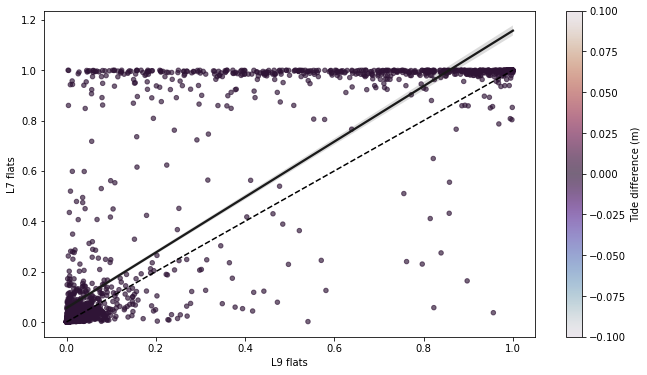

In [23]:
import seaborn as sns

calibr_79 = pd.concat(calibr4)

# calibr_89 = calibr_89[calibr_89['ndwi'].between(-2, 2) & calibr_89['ndwi_1'].between(-2, 2)] #getting rid of the outliers
calibr_79 = calibr_79[calibr_79['tidedifference'].between(-0.01, 0.01)]

fig, ax = plt.subplots()
fig.set_size_inches(11, 6)

points = plt.scatter(data = calibr_79, x = 'flats_1', y='flats',
                     c="tidedifference", s=20, cmap="twilight", alpha=0.65)
plt.colorbar(points, label = 'Tide difference (m)')
sns.regplot(x='flats_1', y="flats", data=calibr_79, scatter=False, color=".1").set(xlabel='L9 flats', ylabel='L7 flats')

# g.set_axis_labels("L8 ndwi", "L9 ndwi")
# plt.plot([-0.1, 0.4], [-0.1, 0.4], 'k--')

# display(calibr_89)
print(len(calibr_79))
print(len(calibr_79['tidedifference'].unique()))

plt.plot([0, 1], [0, 1], 'k--')

In [24]:
#Cross cal regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

calibr_79 = pd.concat(calibr4)
calibr_79 = calibr_79[calibr_79['tidedifference'].between(-0.04, 0.04)] #Keep it consistent

#L8 = m*L9 + c

#evi
mod = sm.OLS(calibr_79.evi_1, calibr_79.evi)
res = mod.fit()

print(res.summary()) 

# lm = LinearRegression().fit(np.array(calibr_list.evi_1).reshape((-1, 1)), np.array(calibr_list.evi).reshape((-1, 1)))

print('evi: ')

x = calibr_79[['evi_1']] #L9
y = calibr_79['evi'] #L7
lm = LinearRegression().fit(x,y)

print(lm.coef_)
print(lm.intercept_)
print(lm.score)
print(len(x))

print(lm.score(x,y))

#ndwi

print('ndwi: ')

x = calibr_79[['ndwi_1']] #L9
y = calibr_79['ndwi'] #L7
lm = LinearRegression().fit(x,y)

print(lm.coef_)
print(lm.intercept_)
print(lm.score)

print(lm.score(x,y))
print(len(x))

                                 OLS Regression Results                                
Dep. Variable:                  evi_1   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          5.259e+04
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                        0.00
Time:                        13:31:44   Log-Likelihood:                          8271.2
No. Observations:                2733   AIC:                                 -1.654e+04
Df Residuals:                    2732   BIC:                                 -1.653e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
#Fin